<a href="https://colab.research.google.com/github/a-forty-two/HPE-DecJanFeb2021/blob/main/HPE_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [6]:
import numpy as np
import matplotlib.pyplot as plt
i1= np.array([np.array([400,400]),np.array([400,400])])
i2 =np.array([np.array([400,400]),np.array([0,0])])
i3 =np.array([np.array([400,0]),np.array([400,0])])

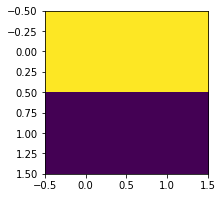

In [16]:
plt.figure(figsize=(3,3))
plt.imshow(i2)

In [12]:
k_h = np.array([np.array([2,2]),np.array([-2,-2])])
k_v = np.array([np.array([2,-2]),np.array([2,-2])])
def applyKernel(img, kernel):
  return np.sum(np.multiply(img, kernel)) 

edgeDetected = lambda val: 'Edge Detected' if val>0 else 'No Edge Detected'

In [18]:
for i in [i1,i2,i3]:
  print('Horizontal: ' + edgeDetected(applyKernel(i,k_h)))
  print('Vertical: ' +edgeDetected(applyKernel(i,k_v)))
  print('****')

Horizontal: No Edge Detected
Vertical: No Edge Detected
****
Horizontal: Edge Detected
Vertical: No Edge Detected
****
Horizontal: No Edge Detected
Vertical: Edge Detected
****
